In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df=dataset['train'].to_pandas()

In [3]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [4]:
df['job_posted_month']=df['job_posted_date'].dt.month

In [6]:
df['job_posted_month_name'] = df['job_posted_date'].dt.month_name()

In [7]:
df['job_posted_month']
df['job_posted_month_name']

0            June
1         January
2         October
3            July
4          August
           ...   
785736      March
785737      March
785738      March
785739      March
785740      March
Name: job_posted_month_name, Length: 785741, dtype: object

In [8]:
df.pivot_table(index='job_posted_month_name',values='job_posted_month',aggfunc='count',columns='job_country')

job_country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
job_posted_month_name,,,,,,,,,,,,,,,,,,,,,
April,2.0,12.0,6.0,NaN,538.0,17.0,977.0,638.0,5.0,8.0,...,351.0,2094.0,17282.0,50.0,26.0,6.0,169.0,NaN,12.0,3.0
August,NaN,14.0,11.0,1.0,1367.0,36.0,1407.0,688.0,6.0,1.0,...,1081.0,2711.0,21029.0,184.0,34.0,3.0,154.0,NaN,12.0,5.0
December,1.0,6.0,2.0,1.0,568.0,13.0,608.0,793.0,5.0,2.0,...,499.0,3345.0,13153.0,120.0,16.0,2.0,216.0,2.0,5.0,2.0
February,NaN,10.0,11.0,1.0,372.0,34.0,822.0,1066.0,13.0,3.0,...,461.0,3619.0,18020.0,52.0,25.0,5.0,135.0,2.0,4.0,9.0
January,4.0,12.0,16.0,NaN,848.0,35.0,1746.0,1355.0,8.0,4.0,...,975.0,4781.0,22670.0,138.0,39.0,13.0,216.0,1.0,9.0,6.0
July,2.0,8.0,16.0,1.0,847.0,20.0,1066.0,644.0,10.0,5.0,...,697.0,3187.0,16210.0,135.0,28.0,7.0,135.0,1.0,12.0,8.0
June,1.0,7.0,7.0,2.0,488.0,22.0,730.0,669.0,2.0,17.0,...,592.0,2805.0,16694.0,126.0,23.0,10.0,165.0,1.0,13.0,16.0
March,3.0,9.0,16.0,1.0,478.0,37.0,1025.0,762.0,5.0,9.0,...,410.0,2773.0,17904.0,48.0,60.0,3.0,144.0,NaN,11.0,6.0
May,NaN,9.0,4.0,1.0,313.0,19.0,678.0,438.0,7.0,14.0,...,315.0,2236.0,15283.0,41.0,16.0,2.0,111.0,NaN,10.0,8.0


In [9]:
df_india=df[df['job_country']=='India']

In [11]:
df_india_pivot_table=df_india.pivot_table(index='job_posted_month_name',values='job_posted_month',aggfunc='count',columns='job_title_short')


In [12]:
job_titles=['Data Analyst','Data Engineer','Data Scientist']

In [13]:
df_india_pivot_table=df_india_pivot_table[job_titles]

In [15]:
df_india_pivot_table=df_india_pivot_table.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [16]:
df_india_pivot_table

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_posted_month_name,,,
January,628,2132,1444
February,433,1631,932
March,422,1591,1005
April,418,1566,946
May,278,1384,837
June,367,1632,1129
July,457,1528,1123
August,618,1407,1157
September,630,1508,984


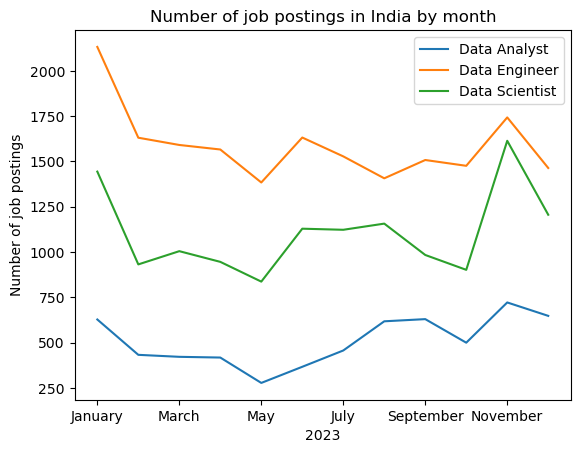

In [19]:
df_india_pivot_table.plot(kind='line')
plt.title('Number of job postings in India by month')
plt.xlabel('2023')
plt.ylabel('Number of job postings')
plt.legend()
plt.show()